**Sentiment Analysis on IMDB Movie Review Dataset**

1. Introduction:
Sentiment analysis, a subfield of natural language processing, aims to determine the emotional tone behind a piece of text. In this project, sentiment analysis was performed on the IMDB movie review dataset consisting of 50,000 records. The goal was to classify movie reviews as either positive or negative based on their sentiment.

2. Dataset:
The IMDB movie review dataset comprises 50,000 movie reviews, evenly split into 25,000 for training and 25,000 for testing. Each review is labeled as either positive or negative.

3. Methodology:

  *Data Preprocessing:*
  Text data was preprocessed by removing HTML tags, punctuation, and special characters.
  Tokenization was performed to split text into individual words.
  Stop words were removed to reduce noise in the data.

  *Word Embeddings:*
  GloVe (Global Vectors for Word Representation) embeddings were utilized to represent words in a continuous vector space.

  *Model Architecture:*
  Bidirectional LSTM (Long Short-Term Memory) neural network was employed for sentiment classification.
  LSTM units were bidirectional to capture contextual information from both past and future sequences.
  Dropout regularization was applied to prevent overfitting.

  *Training:*
  The TensorFlow library was utilized for building and training the neural network model.
  The training dataset was used to train the model, optimizing it to minimize the loss function.

  *Evaluation:*
  The model's performance was evaluated on the test dataset to assess its accuracy and generalization ability.





4. Results:
The Bidirectional LSTM model achieved an accuracy of **86.75%** on the IMDB movie review dataset, indicating its effectiveness in sentiment analysis.
The model demonstrated robustness in distinguishing between positive and negative sentiments in movie reviews.

5. Libraries Used:
TensorFlow: Used for building and training the neural network model.
NLTK (Natural Language Toolkit): Utilized for text preprocessing tasks such as tokenization and stop word removal.

**STEPS FOLLOWED IN THIS PROJECT**
1. Importing the dataset.
2. Checking for Imbalanced dataset.
3. Preprocess the **review** feature as text contains punctuations, brackets, HTML tags and numbers.
4. Preprocessing and applying stopwords.
5. Train_test_split the data
6. Tokenizing the words.
7. Padding and applying GloVe embedding.
8. Create and training Bidirectional LSTM.
9. Calculating Score

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("a1_IMDB_Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

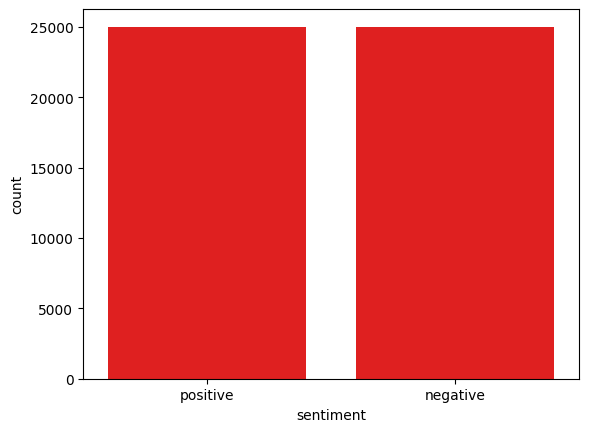

In [ ]:
#checking for imbalanced data
import seaborn as sns
sns.countplot(x='sentiment', data=df,color='red')

In [ ]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
# we can see that our text contains punctuations, brackets, HTML tags and numbers
# We will preprocess this text
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

In [ ]:
# Converting target feature 'sentiment' labels to 0 & 1
y = df['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
# Calling preprocessing_text function on df

X = []
sentences = list(df['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from keras.preprocessing.text import one_hot, Tokenizer
'''
When you fit a Tokenizer to a corpus of text data using the fit_on_texts method,
it creates a mapping from words (or tokens) to integers. Each unique word (token) in the vocabulary is assigned a unique integer index.
This index starts from 1 and goes up to the total number of unique words in the vocabulary.

The texts_to_sequences method takes a list of texts (sentences or documents) as input and converts each text into a sequence of integers,
where each integer corresponds to the index of the word (token) in the tokenizer's vocabulary.
'''

word_tokenizers = Tokenizer()
word_tokenizers.fit_on_texts(X_train)

X_train = word_tokenizers.texts_to_sequences(X_train)
X_test = word_tokenizers.texts_to_sequences(X_test)

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizers.word_index) + 1

vocab_length

92394

In [ ]:
# Padding all reviews to fixed length 100
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizers.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(92394, 100)

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.optimizers import Adam

In [ ]:
#Creating the Bidirectional LSTM Neural Network
model = Sequential()
model.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(rate=0.6))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.002), metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                4112      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9478025 (36.16 MB)
Trainable params: 238625 (932.13 KB)
Non-trainable params: 9239400 (35.25 MB)
_________

In [ ]:
model_history = model.fit(X_train,y_train,batch_size=256,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
157/157 [==============================] - 186s 1s/step - loss: 0.5156 - accuracy: 0.7418 - val_loss: 0.4304 - val_accuracy: 0.8031
Epoch 2/10
157/157 [==============================] - 177s 1s/step - loss: 0.4259 - accuracy: 0.8080 - val_loss: 0.4065 - val_accuracy: 0.8124
Epoch 3/10
157/157 [==============================] - 180s 1s/step - loss: 0.3810 - accuracy: 0.8321 - val_loss: 0.3926 - val_accuracy: 0.8213
Epoch 4/10
157/157 [==============================] - 181s 1s/step - loss: 0.3569 - accuracy: 0.8450 - val_loss: 0.3440 - val_accuracy: 0.8516
Epoch 5/10
157/157 [==============================] - 180s 1s/step - loss: 0.3324 - accuracy: 0.8588 - val_loss: 0.3353 - val_accuracy: 0.8532
Epoch 6/10
157/157 [==============================] - 181s 1s/step - loss: 0.3141 - accuracy: 0.8668 - val_loss: 0.3276 - val_accuracy: 0.8590
Epoch 7/10
157/157 [==============================] - 179s 1s/step - loss: 0.3097 - accuracy: 0.8690 - val_loss: 0.3533 - val_accuracy: 0.8502

In [ ]:
#prediction
y_pred=model.predict(X_test)

313/313 [==============================] - 34s 106ms/step


In [ ]:
import numpy as np

y_pred=np.where(y_pred>=0.5,1,0)

In [ ]:
#Confusion metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
confusion_matrix(y_test,y_pred)

array([[4193,  768],
       [ 557, 4482]])

In [ ]:
#Accuracy score
print(accuracy_score(y_test,y_pred))

0.8675


In [ ]:
#CLassification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      4961
           1       0.85      0.89      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

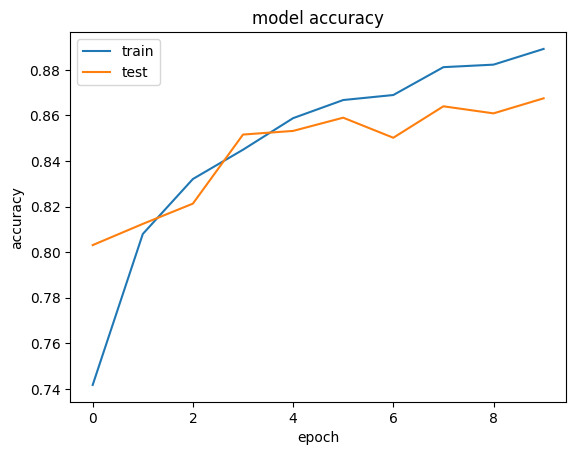

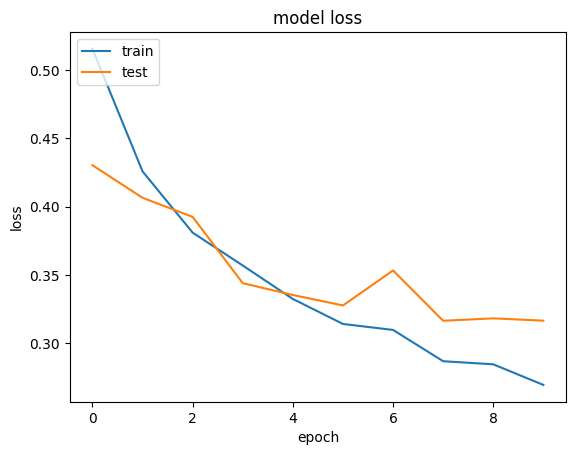

In [ ]:
#Plotting Model accuracy and loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**CONCLUSION**
Through the utilization of Bidirectional LSTM neural networks, this project successfully conducted sentiment analysis on the IMDB movie review dataset. The obtained accuracy of **86.75%** demonstrates the model's capability to discern sentiment from textual data. Further experimentation with different neural network architectures or advanced techniques may lead to even better performance.